# Term Project: Predictive Modelling for Customer Churn

**Done By:** 

| Student Name    | Student ID |
|---------------- |------------|
| Zahraa Fadhel   | 202209444  |
| Zahra Mohd Redha| 202203876  |


## 1. Project Overview

Predicting customer churn—when customers stop using a company's products or services—is a high-priority business problem because retaining an existing customer is typically far less expensive than acquiring a new one. This project asks us to design, implement, and evaluate a machine learning pipeline that predicts which customers are likely to churn, using the Telco Customer Churn dataset. We will work through the full data-science lifecycle: data exploration, cleaning and preprocessing, feature engineering, model selection and training, evaluation using appropriate metrics, and interpretation of results with business-focused recommendations.


## 2. Dataset Information

We will be working with the **"Telco Customer Churn"** dataset from Kaggle, which contains information about a telecommunications company's customers and whether they churned in the last month.

**Dataset Link:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Key Features:**
- **Customer Demographics:** gender, SeniorCitizen, Partner, Dependents
- **Account Information:** tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
- **Services:** PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
- **Target Variable:** Churn (Yes/No)


## 3. Project Workflow

This notebook follows a structured approach:

1. **Data Loading and Initial Exploration**
1. **Data Preprocessing and Feature Engineering**
1. **Model Building and Training**
1. **Model Evaluation and Comparison**
1. **Conclusion and Recommendations**
---

*Let's begin!*

# Part 1: Data Loading and Initial Exploration

In [ ]:
# Dataset downloaded from kaggle using get_dataset.py script
# Load the dataset into a Pandas DataFrame
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
df.head()

In [ ]:
# check data types
df.dtypes

In [ ]:
# Identify null values
df.isnull().sum()

In [ ]:
# check nan values 
df.isna().sum()

In [ ]:
# check empty strings or only spaces values in string columns

for col in df.columns:
    if df[col].dtype == 'object':  # Only check string/object columns
        # Count empty strings
        empty_count = (df[col] == '').sum()
        
        # Count strings with only whitespace
        whitespace_count = (df[col].str.strip() == '').sum()
        
        if empty_count > 0 or whitespace_count > 0:
            print(f"\n{col}:")
            print(f"  - Empty strings: {empty_count}")
            print(f"  - Whitespace-only strings: {whitespace_count}")
            
            # Show the rows with these issues
            if whitespace_count > 0:
                print()
                problematic_rows = df[df[col].str.strip() == '']
                print(f"All {len(problematic_rows)} problematic rows:")
                print(f"Note: indeces shown are in DataFrame. In CSV it's row = index + 2 (e.g row 488 in csv is 490)\n")
                print(problematic_rows[[col]])


<font size="5">Above results show there are 11 missing values (empty), all in TotalCharges column </br> we'll fix it in part 2</font>

In [ ]:
# unique values in each column
df.nunique()

In [ ]:
# Display unique values for categorical columns
print("MultipleLines:", df['MultipleLines'].unique())
print("InternetService:", df['InternetService'].unique())
print("OnlineSecurity:", df['OnlineSecurity'].unique())
print("OnlineBackup:", df['OnlineBackup'].unique())
print("DeviceProtection:", df['DeviceProtection'].unique())
print("TechSupport:", df['TechSupport'].unique())
print("StreamingTV:", df['StreamingTV'].unique())
print("StreamingMovies:", df['StreamingMovies'].unique())
print("Contract:", df['Contract'].unique())
print("PaymentMethod:", df['PaymentMethod'].unique())

<font size="5">Notice here some features have different string values but they mean the same thing </br> (e.g. "No" = "No phone service") </font>

In [ ]:
# Summarize descriptive statistics for numerical features
df.describe()

In [ ]:
# Perform initial EDA to understand the distribution of features and their relationship with the target variable.
# Visualize key insights (e.g., churn rate by contract type, internet service, tenure).

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 1. Dataset Overview (Before Preprocessing)
print("DATASET OVERVIEW BEFORE PREPROCESSING")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Total customers: {len(df):,}")
print(f"Churn rate: {(df['Churn'] == 'Yes').sum() / len(df) * 100:.1f}%")
print(f"Missing values: {len(problematic_rows)}")

# 2. Feature Distribution Analysis
print("\nFEATURE DISTRIBUTION SUMMARY")
print("="*50)

# Check data types
print("Data Types:")
print(df.dtypes.value_counts())

# Categorical features summary
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod', 'Churn']

print(f"\nCategorical Features Value Counts:")
for col in categorical_cols:
    print(df[col].value_counts())
    print()

# 3. Churn Analysis by Features
print("\nCHURN ANALYSIS BY KEY FEATURES")
print("="*50)

# Create subplots for churn analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Churn Analysis by Key Features (Before Preprocessing)', fontsize=16, fontweight='bold')

# Contract vs Churn
sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Contract Type')
axes[0,0].tick_params(axis='x', rotation=45)

# Internet Service vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Internet Service Type')
axes[0,1].tick_params(axis='x', rotation=45)

# Payment Method vs Churn
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axes[0,2])
axes[0,2].set_title('Churn by Payment Method')
axes[0,2].tick_params(axis='x', rotation=45)

# Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn')
axes[1,0].set_xlabel('Tenure (months)')

# Monthly charges distribution by churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, ax=axes[1,1])
axes[1,1].set_title('Monthly Charges Distribution by Churn')
axes[1,1].set_xlabel('Monthly Charges ($)')

# Senior citizen vs churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[1,2])
axes[1,2].set_title('Churn by Senior Citizen Status')
axes[1,2].set_xlabel('Senior Citizen (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# 4. Additional Analysis - Service Usage Patterns
print("\nSERVICE USAGE PATTERNS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Service Usage and Churn Patterns (Before Processing)', fontsize=16, fontweight='bold')

# Partner vs Churn
sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Partner Status')

# Dependents vs Churn
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Dependents Status')

# Phone Service vs Churn
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Phone Service')

# Paperless Billing vs Churn
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=axes[1,1])
axes[1,1].set_title('Churn by Paperless Billing')

plt.tight_layout()
plt.show()

# 5. Key Insights Summary
print("\nKEY INSIGHTS FROM INITIAL EDA")
print("="*50)
churn_count = (df['Churn'] == 'Yes').sum()
total_customers = len(df)
churn_rate = (churn_count / total_customers) * 100

print(f"Overall Statistics:")
print(f"  - Total customers: {total_customers:,}")
print(f"  - Churned customers: {churn_count:,}")
print(f"  - Overall churn rate: {churn_rate:.1f}%")

# Contract insights
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nContract Analysis:")
for contract, rate in contract_churn.items():
    print(f"  - {contract}: {rate:.1f}% churn rate")

# Internet service insights
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nInternet Service Analysis:")
for service, rate in internet_churn.items():
    print(f"  - {service}: {rate:.1f}% churn rate")

# Payment method insights
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nPayment Method Analysis:")
for method, rate in payment_churn.items():
    print(f"  - {method}: {rate:.1f}% churn rate")

# Tenure insights
short_tenure_churn = df[df['tenure'] <= 12]['Churn'].apply(lambda x: x == 'Yes').mean() * 100
long_tenure_churn = df[df['tenure'] > 12]['Churn'].apply(lambda x: x == 'Yes').mean() * 100
print(f"\nTenure Analysis:")
print(f"  - Short tenure (≤12 months): {short_tenure_churn:.1f}% churn rate")
print(f"  - Long tenure (>12 months): {long_tenure_churn:.1f}% churn rate")

# Demographic insights
gender_churn = df.groupby('gender')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nDemographic Analysis:")
for gender, rate in gender_churn.items():
    print(f"  - {gender}: {rate:.1f}% churn rate")

senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"  - Non-Senior Citizens: {senior_churn[0]:.1f}% churn rate")
print(f"  - Senior Citizens: {senior_churn[1]:.1f}% churn rate")

# Part 2: Data Preprocessing and Feature Engineering

In [ ]:
# Drop customerID because it doesn't help in predictive
df.drop('customerID', axis=1, inplace=True) 

In [ ]:
# Missing values identified in part 1 will be replaced by NaN for now

# convert TotalCharges to numeric
# any value that cannot be converted to a numeric type will be replaced with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

nan_rows = df[df['TotalCharges'].isna()]
print("11 Rows with NaN in TotalCharges:")
print(nan_rows[['gender', 'SeniorCitizen', 'Partner', 
                'tenure', 'MonthlyCharges', 'TotalCharges']])


In [ ]:
# Impute missing value using median imputation 
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit on the column and transform it
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

# Verify no NaNs remain
print("NaNs after imputation:", df['TotalCharges'].isna().sum())

print(f"Method: Median imputation")
print(f"Median value used: {imputer.statistics_[0]:.2f}")
print(f"Number of values imputed: 11")

### Justification for Median Imputation

We chose **median imputation** to handle the 11 missing values in `TotalCharges` because:

**1. They are small number of missing values (0.16% of data)**
   - Only 11 out of 7,043 records have missing TotalCharges
   - We could delete these rows and it would not significantly impact the dataset size. however, we chose to impute to preserve all customer records for better model training

**2. Median is robust to outliers**
   - TotalCharges has outliers because of customers with long tenure and high-value
   - Mean imputation would be sensitive to these extreme values so we rejected it
   - Median provides a more representative central value

**3. Pattern in missing data**
   - From our exploration, all 11 missing values occur for customers with very low tenure (0-2 months)
   - These customers likely haven't been billed yet (TotalCharges ≈ 0 or very low)
   - The median captures typical billing amounts for similar customers

**4. Preserves data distribution**
   - Median imputation doesn't distort the overall distribution of TotalCharges
   - On the other hand, methods like mean imputation could introduce bias

**Alternative methods but rejected:**
- **Deletion**: Would lose 11 customer records unnecessarily
- **Mean imputation**: Too sensitive to outliers in billing data
- **Zero imputation**: Would incorrectly suggest no charges for existing customers
- **Predictive imputation (KNN/regression)**: Adds unnecessary complexity and overkill for only 11 values

### Convert categorical features into numerical representations

### It is better to store attributes with 2 values only (e.g Yes/No) to 0 representing No(False) and 1 representing Yes(True). Other values indicating false falues such as "No phone service" will be represented by 0 also. So we used label encoding for the following attributes: SeniorCitizen, Partner, Dependents, PhoneService, Multiple Lines, OnlineSecurity, onlineBackUp, DeviceProtection, TechsSupport, StreamingTV, StreamingMovies, PaperlessBilling and the target attribute Churn 

### Why we choose 0 and 1 to represent true/false values instead of boolean ?
1. ML compatibility: scikit-learn models work seamlessly with integer features 
2. Consistent numerical processing: so we don't need any dtype conversion needed during model training
3. Better performance: Faster computations due to above point

In [ ]:
# Convert 'Partner' to int representing boolean
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

# Convert 'Dependents' to int representing boolean
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

# Convert 'PhoneService' to int representing boolean
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

# Convert 'MultipleLines' to int representing boolean
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

# Convert 'OnlineSecurity' to int representing boolean
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'OnlineBackup' to int representing boolean
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'DeviceProtection' to int representing boolean
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'TechSupport' to int representing boolean
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'StreamingTV' to int representing boolean
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'StreamingMovies' to int representing boolean
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'PaperlessBilling' to int representing boolean
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Convert 'Churn' to int representing boolean
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check data types again
df.dtypes

### Convert gender to numerical values
#### Using Label encoding (0/1), Why? Becauaes there are only 2 categories with no no ordinal relationship

In [ ]:
# Convert gender to binary encoding
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

### Convert Contract to numerical values
#### Using Ordinal encoding (0, 1, 2), Why? Becauaes there are 3 values with clear ordinal relationship as longer contracts show increasing commitment

In [ ]:
# Convert Contract to ordinal encoding (commitment level)
df['Contract'] = df['Contract'].map({
    'Month-to-month': 0,
    'One year': 1, 
    'Two year': 2
})

### Convert PaymentMethod to numerical values
#### Using One-hot encoding, Why? Because there are 4 categories with no ordinal relationship, so we need to avoid artificial ordering. This will create 4 binary columns, one for each payment method type (Bank transfer, Credit card, Electronic check, Mailed check), where each customer will have a value of 1 in only one column and 0 in the others.

In [ ]:
# One-hot encode PaymentMethod
# converts 'PaymentMethod' col into multiple binary (0/1) columns — one for each unique category with prefix 'Payment'
payment_dummies = pd.get_dummies(df['PaymentMethod'], prefix='Payment').astype(int)
df = pd.concat([df, payment_dummies], axis=1)
df.drop('PaymentMethod', axis=1, inplace=True) # remove original column

### Convert InternetService to numerical values
#### Using One-hot encoding, Why? Because there are 3 categories representing different service types and no clear ordering. This will create 3 binary columns (Internet_DSL, Internet_Fiber optic, Internet_No), where each customer will have a value of 1 in their service type column and 0 in the others. 'Internet_No' will be used to determine if customer has internet or not. Internet_No = 1 means the customer has NO internet service. Internet_DSL = 1 means the customer has DSL. Internet_Fiber optic = 1 means the customer has Fiber optic.

In [ ]:
# One-hot encode InternetService
# converts 'InternetService' col into multiple binary (0/1) columns — one for each unique category with prefix 'Internet'
internet_dummies = pd.get_dummies(df['InternetService'], prefix='Internet').astype(int)
df = pd.concat([df, internet_dummies], axis=1)
df.drop('InternetService', axis=1, inplace=True) # remove original column

In [ ]:
# Get cols
cols = df.columns.tolist()
print("Current columns:")
print(cols)

# Uniform column names to snake_case
column_mapping = {
    'SeniorCitizen': 'senior_citizen',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'Contract': 'contract',
    'Churn': 'churn',
    'Payment_Bank transfer (automatic)': 'payment_bank_transfer',
    'Payment_Credit card (automatic)': 'payment_credit_card',
    'Payment_Electronic check': 'payment_electronic_check',
    'Payment_Mailed check': 'payment_mailed_check',
    'Internet_DSL': 'internet_dsl',
    'Internet_Fiber optic': 'internet_fiber_optic',
    'Internet_No': 'internet_no'
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

# reinsert 'chrun' at the end if needed
df['churn'] = df.pop('churn')

print(f"\nUniform columns ({len(df.columns)} total):")
print(df.columns.tolist())


In [ ]:
# datatypes after preprocessingp
df.dtypes

In [ ]:
# first few cols after preprocessing
df.head()

### Scale numerical features to ensure no single feature dominates the model training.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features that need scaling
numerical_features = ['tenure', 'monthly_charges', 'total_charges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display statistics after scaling
print("Numerical Features After Scaling:")
print("="*50)
print(df[numerical_features].describe().round(3))

print(f"\n** Mean of scaled features should be ~0, std should be ~1 **")

# Verify scaling
print("\nVerification:")
for col in numerical_features:
    print(f"{col}: mean={df[col].mean():.4f}, std={df[col].std():.4f}")

# Display first few rows to see scaled values 
print("\nFirst 5 rows of scaled features:")
print(df[numerical_features].head())

In [ ]:
# Perform initial EDA to understand the distribution of features and their relationship with the target variable AFTER preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 1. Dataset Overview
print("DATASET OVERVIEW AFTER PREPROCESSING")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Total customers: {len(df):,}")
print(f"Churn rate: {(df['churn'].sum() / len(df)) * 100:.1f}%")
print(f"Missing values: {df.isnull().sum().sum()}")

# 2. Feature Distribution Analysis
print("\nFEATURE DISTRIBUTION SUMMARY")
print("="*50)

# Continuous features
continuous_cols = ['tenure', 'monthly_charges', 'total_charges']
print("Continuous Features:")
print(df[continuous_cols].describe().round(2))

# Binary features summary
binary_cols = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 
               'multiple_lines', 'online_security', 'online_backup', 'device_protection',
               'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']

print(f"\nBinary Features (% of customers with feature = 1):")
for col in binary_cols:
    percentage = (df[col].sum() / len(df)) * 100
    print(f"{col}: {percentage:.1f}%")

# 3. Churn Analysis by Features
print("\nCHURN ANALYSIS BY KEY FEATURES")
print("="*50)

# Create subplots for churn analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Churn Analysis by Key Features (After Preprocessing)', fontsize=16, fontweight='bold')

# Contract vs Churn
sns.countplot(data=df, x='contract', hue='churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Contract Type')
axes[0,0].set_xlabel('Contract (0=Month-to-month, 1=One year, 2=Two year)')

# Internet Service vs Churn
internet_data = df[['internet_dsl', 'internet_fiber_optic', 'internet_no', 'churn']]
internet_type = []
for _, row in df.iterrows():
    if row['internet_dsl'] == 1:
        internet_type.append('DSL')
    elif row['internet_fiber_optic'] == 1:
        internet_type.append('Fiber Optic')
    else:
        internet_type.append('No Internet')

df_temp = df.copy()
df_temp['internet_type'] = internet_type
sns.countplot(data=df_temp, x='internet_type', hue='churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Internet Service Type')
axes[0,1].tick_params(axis='x', rotation=45)

# Payment Method vs Churn
payment_type = []
payment_cols = ['payment_bank_transfer', 'payment_credit_card', 'payment_electronic_check', 'payment_mailed_check']
for _, row in df.iterrows():
    if row['payment_bank_transfer'] == 1:
        payment_type.append('Bank Transfer')
    elif row['payment_credit_card'] == 1:
        payment_type.append('Credit Card')
    elif row['payment_electronic_check'] == 1:
        payment_type.append('Electronic Check')
    else:
        payment_type.append('Mailed Check')

df_temp['payment_type'] = payment_type
sns.countplot(data=df_temp, x='payment_type', hue='churn', ax=axes[0,2])
axes[0,2].set_title('Churn by Payment Method')
axes[0,2].tick_params(axis='x', rotation=45)

# Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='churn', multiple='stack', bins=30, ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn')
axes[1,0].set_xlabel('Tenure (months)')

# Monthly charges distribution by churn
sns.histplot(data=df, x='monthly_charges', hue='churn', multiple='stack', bins=30, ax=axes[1,1])
axes[1,1].set_title('Monthly Charges Distribution by Churn')
axes[1,1].set_xlabel('Monthly Charges ($)')

# Senior citizen vs churn
sns.countplot(data=df, x='senior_citizen', hue='churn', ax=axes[1,2])
axes[1,2].set_title('Churn by Senior Citizen Status')
axes[1,2].set_xlabel('Senior Citizen (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

In [ ]:
print("\nSERVICE USAGE PATTERNS (AFTER PREPROCESSING)")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Service Usage and Churn Patterns (After Preprocessing)', fontsize=16, fontweight='bold')

# Partner vs Churn
sns.countplot(data=df, x='partner', hue='churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Partner Status')
axes[0,0].set_xlabel('Partner (0=No, 1=Yes)')

# Dependents vs Churn
sns.countplot(data=df, x='dependents', hue='churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Dependents Status')
axes[0,1].set_xlabel('Dependents (0=No, 1=Yes)')

# Phone Service vs Churn
sns.countplot(data=df, x='phone_service', hue='churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Phone Service')
axes[1,0].set_xlabel('Phone Service (0=No, 1=Yes)')

# Paperless Billing vs Churn
sns.countplot(data=df, x='paperless_billing', hue='churn', ax=axes[1,1])
axes[1,1].set_title('Churn by Paperless Billing')
axes[1,1].set_xlabel('Paperless Billing (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# Service usage churn analysis
print("\nService Usage Churn Analysis:")
partner_churn = df.groupby('partner')['churn'].mean() * 100
print(f"  - With Partner: {partner_churn[1]:.1f}% churn rate")
print(f"  - Without Partner: {partner_churn[0]:.1f}% churn rate")

dependents_churn = df.groupby('dependents')['churn'].mean() * 100
print(f"  - With Dependents: {dependents_churn[1]:.1f}% churn rate")
print(f"  - Without Dependents: {dependents_churn[0]:.1f}% churn rate")

paperless_churn = df.groupby('paperless_billing')['churn'].mean() * 100
print(f"  - Paperless Billing: {paperless_churn[1]:.1f}% churn rate")
print(f"  - Non-Paperless Billing: {paperless_churn[0]:.1f}% churn rate")

In [ ]:
# 4. Correlation Analysis
print("\nCORRELATION ANALYSIS")
print("="*50)

# Calculate correlation with churn
correlations = df.corr()['churn'].sort_values(key=abs, ascending=False)
print("Top 10 features correlated with churn:")
print(correlations.head(11).round(3))  # 11 to exclude churn itself

# Correlation heatmap for top features
top_features = correlations.head(11).index.tolist()
plt.figure(figsize=(12, 10))
correlation_matrix = df[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.1, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Top Features with Churn')
plt.tight_layout()
plt.show()


In [ ]:
# 5. Key Insights Summary
print("\nKEY INSIGHTS FROM EDA")
print("="*50)
churn_rate = (df['churn'].sum() / len(df)) * 100

# Contract insights
contract_churn = df.groupby('contract')['churn'].agg(['count', 'sum', 'mean'])
print(f"Contract Analysis:")
print(f"  - Month-to-month: {contract_churn.loc[0, 'mean']*100:.1f}% churn rate")
print(f"  - One year: {contract_churn.loc[1, 'mean']*100:.1f}% churn rate") 
print(f"  - Two year: {contract_churn.loc[2, 'mean']*100:.1f}% churn rate")

# Internet service insights
internet_churn_dsl = df[df['internet_dsl']==1]['churn'].mean()*100
internet_churn_fiber = df[df['internet_fiber_optic']==1]['churn'].mean()*100
internet_churn_no = df[df['internet_no']==1]['churn'].mean()*100
print(f"\nInternet Service Analysis:")
print(f"  - DSL: {internet_churn_dsl:.1f}% churn rate")
print(f"  - Fiber Optic: {internet_churn_fiber:.1f}% churn rate")
print(f"  - No Internet: {internet_churn_no:.1f}% churn rate")

# Tenure insights
short_tenure_churn = df[df['tenure'] <= 12]['churn'].mean()*100
long_tenure_churn = df[df['tenure'] > 12]['churn'].mean()*100
print(f"\nTenure Analysis:")
print(f"  - Short tenure (≤12 months): {short_tenure_churn:.1f}% churn rate")
print(f"  - Long tenure (>12 months): {long_tenure_churn:.1f}% churn rate")

### Split the dataset into training and testing sets (e.g., 70% train, 30% test) ensuring proper stratification for the Churn variable.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split the dataset: 70% train, 30% test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42, 
    stratify=y  # to ensure balanced churn distribution in both sets
)

# Display split information
print("Dataset Split Summary:")
print("="*50)
print(f"Total samples: {len(df):,}")
print(f"Training samples: {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Testing samples: {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\nFeatures (X): {X.shape[1]} columns")
print(f"Target (y): churn")

# Verify stratification by checking churn distribution in train and test sets
print("\nChurn Distribution Verification:")
print("="*50)
print(f"Original dataset:")
print(f"  - Churn=0 (No): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

print(f"\nTraining set:")
print(f"  - Churn=0 (No): {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")

print(f"\nTesting set:")
print(f"  - Churn=0 (No): {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")

print("\nSo now we have implemented stratification which is to ensure both sets have similar churn proportions")

# Part 3: Model Building and Training

For model training we will use the following five models:

**1. Logistic Regression:**

   linear classification model that predicts the probability that a data point belongs to a certain class (customer will churn (1) or not (0)) 
   It works by:
   * Computing a weighted sum of the input features
   * Passing that value through a sigmoid function
   * Outputting a probability between 0 and 1
   * Applying a threshold (usually 0.5) to determine the class

*Advantages*
   * Customer churn often involves identifiable linear trends (e.g., "low tenure → high churn")
   * It is highly interpretable, allowing us to see which features increase or decrease churn likelihood
   * A great baseline model to compare more complex models against
   * Quick to train and easy to evaluate


**2. Decision Tree Classifier**

Decision Tree is a tree-structured classifier that makes decisions by recursively splitting the data based on feature values.
It works by:
  * Starting at the root node with all training data
  * Selecting the best feature to split on (using metrics like Gini impurity or information gain)
  * Creating branches for each possible value or range
  * Repeating the process recursively for each branch until reaching leaf nodes (predictions)
  * Tree pruning to prevent overfitting by limiting tree depth or minimum samples per leaf

*Advantages*
  * Highly interpretable: the tree structure visualizes the decision-making process, showing which features and thresholds lead to churn
  * Handles non-linear relationships naturally without requiring feature scaling
  * Can capture complex interactions between features (e.g., "low tenure AND fiber optic → high churn")
  * Works well with both numerical and categorical features
  * Easy to explain to business stakeholders: "If tenure < 12 months AND contract is month-to-month, then high churn risk"
  * Provides clear feature importance rankings to identify key churn drivers


**3. Random Forest Classifier**

Random Forest is an ensemble machine learning model that builds many decision trees and combines their outputs.
It includes:
  * Bagging: each tree is trained on a random subset of the training data.
  * Random Feature Selection: each split in a tree considers only a random sample of features.
  * Majority Voting: the final prediction is the majority vote across all trees.

*Advantages*
  * Churn datasets often have complex, non-linear patterns, which trees naturally capture.
  * Performs well on tabular business data with mixed feature types.
  * Handles missing values and unscaled features effectively.
  * Provides feature importance rankings, helping interpret which factors drive churn.
  * Resistant to overfitting due to the ensemble approach.  
  * Handles outliers and high-dimesional data 


**4. Gradient Boosting Classifier (XGBoost)**

XGBoost (Extreme Gradient Boosting) is a powerful gradient boosting algorithm designed for performance and flexibility.
It builds decision trees sequentially, where each new tree focuses on correcting the errors of the previous ensemble.
Key principles:
  * Boosting: each tree learns from the mistakes of the combined previous trees.
  * Regularized gradient optimization: minimizes prediction error while controlling model complexity (prevents overfitting).
  * Tree-based learning: constructs trees using a level-wise growth approach for balanced trees.

*Advantages*
  * Churn prediction involves subtle patterns and interactions between features and boosting models capture these well.
  * XGBoost handles::
      * categorical variables (after encoding)
      * class imbalance (via scale_pos_weight)
      * non-linear relationships between features
  * Offers strong predictive performance on tabular data and is robust to overfitting with proper tuning.


**5. Neural Network (Multi-Layer Perceptron)**

A Multi-Layer Perceptron (MLP) is a feedforward artificial neural network consisting of multiple layers of neurons.
It works by:
  * Input layer: receives the feature values
  * Hidden layers: transform the input through weighted connections and activation functions (typically ReLU)
  * Output layer: produces the final prediction (sigmoid activation for binary classification)
  * Backpropagation: adjusts weights by minimizing the loss function through gradient descent
  * Forward propagation computes predictions, backward propagation updates weights iteratively

*Advantages*
  * Can learn highly complex non-linear relationships between features that other models might miss
  * Automatically discovers feature interactions and representations through hidden layers
  * Flexible architecture: can be adjusted by adding/removing layers and neurons to match problem complexity
  * Handles high-dimensional data well after proper feature scaling (already done in our preprocessing)
  * Can capture subtle patterns in customer behavior that contribute to churn
  * Works effectively with binary classification problems when properly configured
  * Performs well on tabular data when combined with proper regularization techniques

### Model implementations and training 

In [153]:
# 1. Logistic regression implementation 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Train model
logistic_regression = LogisticRegression(
    max_iter=1000,
    class_weight='balanced', # for class imbalance
    solver='lbfgs'
)

logistic_regression.fit(X_train, y_train)

# Make predictions on test data (test model)
y_pred = logistic_regression.predict(X_test)
y_prob = logistic_regression.predict_proba(X_test)[:, 1] # Get predicted probabilities for the positive class (churn=1)

# Print model intercept and coefficients
print("Intercept:", logistic_regression.intercept_[0])

coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logistic_regression.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Display top positive and negative features
print("Top features increasing churn:\n", coeff_df.head(10))
print("\nTop features decreasing churn:\n", coeff_df.tail(10))

# Show first 20 predictions
print("Predicted churn (first 20 customers):", y_pred[:20])

# Preview first 20 probabilities
print("Predicted churn probabilities (first 20 customers):", y_prob[:20])


Intercept: -0.18553466110093464
Top features increasing churn:
                      Feature  Coefficient
22      internet_fiber_optic     0.783032
16             total_charges     0.578388
14         paperless_billing     0.380625
12          streaming_movies     0.317561
6             multiple_lines     0.252383
19  payment_electronic_check     0.214642
11              streaming_tv     0.187379
1             senior_citizen     0.145781
0                     gender     0.051583
21              internet_dsl     0.003119

Top features decreasing churn:
                   Feature  Coefficient
8           online_backup    -0.155772
17  payment_bank_transfer    -0.177972
18    payment_credit_card    -0.181631
3              dependents    -0.261380
5           phone_service    -0.328635
10           tech_support    -0.334300
7         online_security    -0.402621
13               contract    -0.724015
23            internet_no    -1.049903
4                  tenure    -1.203184
Predicted ch

If predicted probability ≥ 0.5 → predicts 1 (churn)

If predicted probability < 0.5 → predicts 0 (no churn)

Predicted churn (first 20 customers): [1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0]
Predicted churn probabilities (first 20 customers): [0.7616284  0.         0.87637425 0.         0.         0.
 0.13332843 0.         0.23528648 0.         0.64863897 0.7346856
 0.         0.23528648 0.21686026 0.77723733 0.         0.
 0.77723733 0.        ]

Top 10 most important features:
                      Feature  Importance
13                  contract    0.454021
4                     tenure    0.127871
15           monthly_charges    0.090648
16             total_charges    0.076607
22      internet_fiber_optic    0.073528
23               internet_no    0.021610
19  payment_electronic_check    0.019385
2                    partner    0.018160
7            online_security    0.016199
14         paperless_billing    0.014081


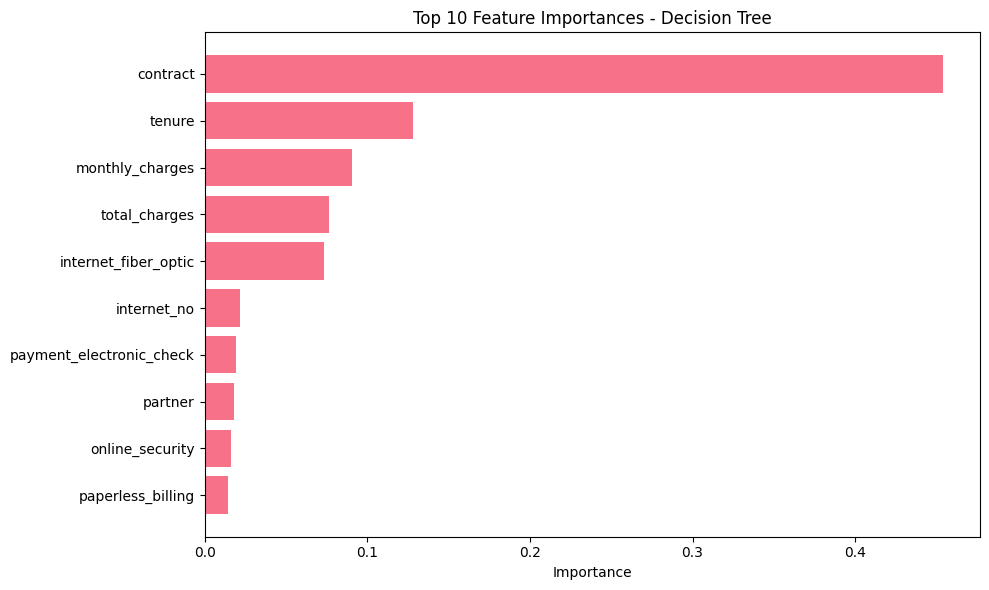

In [154]:
# 2. Decision tree classifier implementation 

from sklearn.tree import DecisionTreeClassifier

# Train model
decision_tree_model = DecisionTreeClassifier(
    max_depth=10,               # limit tree depth to prevent overfitting
    min_samples_split=20,       # minimum samples required to split a node
    min_samples_leaf=10,        # minimum samples required at a leaf node
    class_weight='balanced',    # handle class imbalance
    random_state=42
)

decision_tree_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_dt = decision_tree_model.predict(X_test)
y_prob_dt = decision_tree_model.predict_proba(X_test)[:, 1]  # probability of churn = 1

# Display first 20 predictions
print("Predicted churn (first 20 customers):", y_pred_dt[:20])
print("Predicted churn probabilities (first 20 customers):", y_prob_dt[:20])

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': decision_tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", feature_importance_dt.head(10))

# Visualize top 10 feature importances
plt.figure(figsize=(10, 6))
top_features = feature_importance_dt.head(10)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Predicted churn (first 20 customers): [1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
Predicted churn probabilities (first 20 customers): [0.68771284 0.01228655 0.78705484 0.01714422 0.00540821 0.04544428
 0.02931008 0.19038233 0.09668936 0.00338915 0.12273418 0.70352747
 0.12126254 0.12172244 0.46214575 0.66019722 0.00543998 0.1184317
 0.43260111 0.00301816]

Number of iterations: 16
Number of layers: 5
Output activation function: logistic


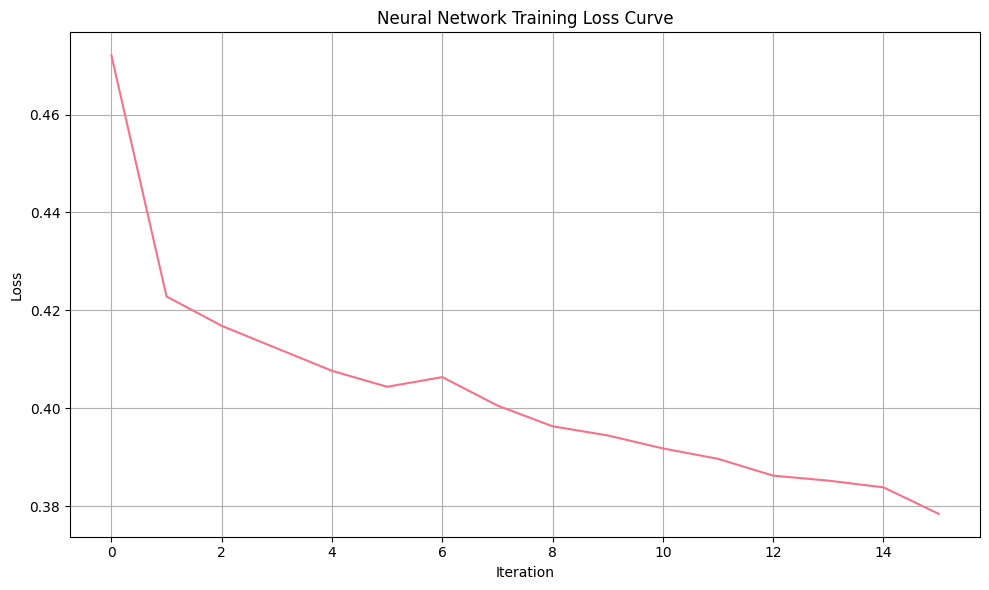

In [155]:
# 3. Neural Network (Multi-Layer Perceptron) implementation

from sklearn.neural_network import MLPClassifier

# Train model
neural_network_model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),  # 3 hidden layers with 64, 32, and 16 neurons
    activation='relu',                 # ReLU activation function for hidden layers
    solver='adam',                     # Adam optimizer for weight updates
    alpha=0.001,                       # L2 regularization parameter to prevent overfitting
    batch_size=32,                     # mini-batch size for training
    learning_rate='adaptive',          # adaptive learning rate
    max_iter=500,                      # maximum number of iterations
    early_stopping=True,               # stop training when validation score doesn't improve
    validation_fraction=0.1,           # 10% of training data for validation
    random_state=42,
    verbose=False
)

neural_network_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_nn = neural_network_model.predict(X_test)
y_prob_nn = neural_network_model.predict_proba(X_test)[:, 1]  # probability of churn = 1

# Display first 20 predictions
print("Predicted churn (first 20 customers):", y_pred_nn[:20])
print("Predicted churn probabilities (first 20 customers):", y_prob_nn[:20])

# Display training information
print(f"\nNumber of iterations: {neural_network_model.n_iter_}")
print(f"Number of layers: {neural_network_model.n_layers_}")
print(f"Output activation function: {neural_network_model.out_activation_}")

# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(neural_network_model.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

In [156]:
# 4. Random forest classifier implementation 

from sklearn.ensemble import RandomForestClassifier


# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,         # let trees grow fully
    class_weight='balanced',# handle class imbalance
    random_state=42
)

# Train model
random_forest_model.fit(X_train, y_train)

# Make predictions on test data ( test model )
y_pred_rf = random_forest_model.predict(X_test)              # predicted churn (0 or 1)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]  # probability of churn = 1

#  Display first 20 predictions and probabilities
print("Predicted churn (first 20 customers):", y_pred_rf[:20])
print("Predicted churn probabilities (first 20 customers):", y_prob_rf[:20])


# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", feature_importance.head(10))



Predicted churn (first 20 customers): [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted churn probabilities (first 20 customers): [0.57 0.02 0.81 0.   0.   0.03 0.01 0.03 0.23 0.   0.12 0.37 0.19 0.05
 0.31 0.44 0.   0.07 0.43 0.  ]

Top 10 most important features:
                      Feature  Importance
16             total_charges    0.166684
15           monthly_charges    0.159888
4                     tenure    0.151077
13                  contract    0.122968
19  payment_electronic_check    0.037576
22      internet_fiber_optic    0.035512
14         paperless_billing    0.028106
0                     gender    0.025741
7            online_security    0.023613
10              tech_support    0.021728


In [157]:
# 5. Gradient boosting classifier (XGBoost) implementation 
from xgboost import XGBClassifier

# Class weight for imbalance
scale_pos_wt = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_wt,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test) # predicted churn (0 or 1)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1] # probability of churn = 1

# Display first 20 predictions
print("\nPredicted churn (first 20 customers):", y_pred_xgb[:20])
print("Predicted churn probabilities (first 20 customers):", y_pred_xgb_prob[:20])

# Feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", importance.head(10))




Predicted churn (first 20 customers): [1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0]
Predicted churn probabilities (first 20 customers): [0.76615804 0.00424949 0.90737194 0.03282519 0.00702441 0.08258322
 0.03627424 0.06667313 0.12615772 0.02809235 0.15093534 0.72268873
 0.183354   0.10321523 0.6106533  0.6763161  0.01106266 0.02714252
 0.65935254 0.00536579]

Top 10 most important features:
                      Feature  Importance
13                  contract    0.299176
22      internet_fiber_optic    0.218533
23               internet_no    0.044549
21              internet_dsl    0.040032
19  payment_electronic_check    0.037711
12          streaming_movies    0.033672
4                     tenure    0.032748
14         paperless_billing    0.027365
7            online_security    0.023037
6             multiple_lines    0.019950


### Tune hyperparameters for at least one of your chosen models using techniques like GridSearchCV or RandomizedSearchCV to optimize performance. 


#### Check baseline performance for each model before tuning model hyperparameters 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluate a classification model and print key metrics.
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probability of churn class (1)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"----- {model_name} base model Evaluation  -----")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (churn=1): {precision:.4f}")
    print(f"Recall (churn=1): {recall:.4f}")
    print(f"F1-Score (churn=1): {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1, "roc_auc": roc_auc}

# Logistic Regression
evaluate_model(logistic_regression, X_test, y_test, "Logistic Regression")

# Decision Tree
evaluate_model(decision_tree_model, X_test, y_test, "Decision Tree")

# Neural Network
evaluate_model(neural_network_model, X_test, y_test, "Neural Network (MLP)")

# Random Forest
evaluate_model(random_forest_model, X_test, y_test, "Random Forest")

# XGBoost
evaluate_model(xgb_model, X_test, y_test, "XGBoost")



TN (True Negative) → Predicted 0, actually 0 → correctly identified non-churners.

FP (False Positive) → Predicted 1, actually 0 → predicted churn but they didn’t churn (false alarm).

FN (False Negative) → Predicted 0, actually 1 → missed a churner.

TP (True Positive) → Predicted 1, actually 1 → correctly predicted churners.

#### Tune hyperparameters for the Random Forest Classifier and Gradient Boosting Classifier (XGBoost) models to optimize their perfomance

we will be using RandomizedSearchCV because it is faster and works well with large hyperparameter spaces

In [ ]:
# Tune hyperparameters for Random Forest Classifier model 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter space
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=random_forest_model, # base model
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
rf_random.fit(X_train, y_train)

# Get best model
best_rf = rf_random.best_estimator_
evaluate_model(best_rf, X_test, y_test, model_name="Random Forest (Tuned)")

# Feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", importance.head(10))


In [ ]:
 # Tune hyperparameters for Gradient Boosting Classifier XGBoost model 
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [1, 2, 5, 10],
    'reg_alpha': [0, 0.1, 0.3, 1],
    'scale_pos_weight': [1, scale_pos_wt]
}

# Create a new XGBoost model for tuning (don't overwrite the baseline model)
xgb_model_for_tuning = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model_for_tuning,
    param_distributions=param_dist,
    n_iter=40,            # number of combinations to try
    scoring='f1',         # or 'roc_auc'
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train, y_train)


best_xgb = xgb_random_search.best_estimator_

evaluate_model(best_xgb, X_test, y_test, "XGBoost (Tuned)")

# Feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", importance.head(10))


# Part 4: Model Evaluation and Comparison

### Comprehensive Model Performance Comparison

Now let's compare all models' performance before and after hyperparameter tuning in a single comprehensive table.

 #### Evaluate each trained model on the test set using appropriate classification metrics. Accuracy, Precision (for churn class), Recall (for churn class), F1-Score (for churn class), ROC AUC Score, Confusion Matrix. 


In [ ]:
# Logistic regression model 
evaluate_model(logistic_regression, X_test, y_test, "Logistic Regression")

# Decision tree classifier
evaluate_model(decision_tree_model, X_test, y_test, "Decision Tree")

# Neural Network
evaluate_model(neural_network_model, X_test, y_test, "Neural Network (MLP)")

# Random forest classifier 
evaluate_model(best_rf, X_test, y_test, model_name="Random Forest (Tuned)")

# Gradient boosting classifier (XGBoost)
evaluate_model(best_xgb, X_test, y_test, "XGBoost (Tuned)")



#### Visualize the ROC curve for your best-performing models

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]
y_prob_dt = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_nn = neural_network_model.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# Compute AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_nn = auc(fpr_nn, tpr_nn)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10,7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Customer Churn Prediction')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Model Performance Comparison - Before and After Tuning

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_model_metrics(model, X_test, y_test):
    """
    Calculate all metrics for a given model
    """
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

# Collect metrics for all models BEFORE tuning
print("="*80)
print("COLLECTING BASELINE MODEL METRICS (BEFORE HYPERPARAMETER TUNING)")
print("="*80)

baseline_metrics = {}

# Models that don't get tuned
baseline_metrics['Logistic Regression'] = get_model_metrics(logistic_regression, X_test, y_test)
baseline_metrics['Decision Tree'] = get_model_metrics(decision_tree_model, X_test, y_test)
baseline_metrics['Neural Network (MLP)'] = get_model_metrics(neural_network_model, X_test, y_test)

# Models before tuning (original versions)
baseline_metrics['Random Forest'] = get_model_metrics(random_forest_model, X_test, y_test)
baseline_metrics['XGBoost'] = get_model_metrics(xgb_model, X_test, y_test)

# Create DataFrame for baseline metrics
baseline_df = pd.DataFrame(baseline_metrics).T
baseline_df = baseline_df.round(4)

print("\nBASELINE MODEL PERFORMANCE (Before Tuning):")
print(baseline_df)

# Collect metrics for models AFTER tuning
print("\n" + "="*80)
print("COLLECTING TUNED MODEL METRICS (AFTER HYPERPARAMETER TUNING)")
print("="*80)

tuned_metrics = {}

# Models that don't get tuned (same as baseline)
tuned_metrics['Logistic Regression'] = baseline_metrics['Logistic Regression']
tuned_metrics['Decision Tree'] = baseline_metrics['Decision Tree']
tuned_metrics['Neural Network (MLP)'] = baseline_metrics['Neural Network (MLP)']

# Tuned models
tuned_metrics['Random Forest (Tuned)'] = get_model_metrics(best_rf, X_test, y_test)
tuned_metrics['XGBoost (Tuned)'] = get_model_metrics(best_xgb, X_test, y_test)

# Create DataFrame for tuned metrics
tuned_df = pd.DataFrame(tuned_metrics).T
tuned_df = tuned_df.round(4)

print("\nTUNED MODEL PERFORMANCE (After Hyperparameter Tuning):")
print(tuned_df)

# Create comprehensive comparison table
print("\n" + "="*80)
print("COMPREHENSIVE COMPARISON: ALL MODELS")
print("="*80)

# Combine both dataframes for side-by-side comparison
comparison_data = {
    'Model': [],
    'Tuning Status': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

# Add baseline models
for model_name, metrics in baseline_metrics.items():
    comparison_data['Model'].append(model_name)
    comparison_data['Tuning Status'].append('Before Tuning')
    for metric_name, value in metrics.items():
        comparison_data[metric_name].append(value)

# Add tuned versions of Random Forest and XGBoost
comparison_data['Model'].append('Random Forest')
comparison_data['Tuning Status'].append('After Tuning')
for metric_name, value in tuned_metrics['Random Forest (Tuned)'].items():
    comparison_data[metric_name].append(value)

comparison_data['Model'].append('XGBoost')
comparison_data['Tuning Status'].append('After Tuning')
for metric_name, value in tuned_metrics['XGBoost (Tuned)'].items():
    comparison_data[metric_name].append(value)

# Create comprehensive DataFrame
comprehensive_df = pd.DataFrame(comparison_data)
comprehensive_df = comprehensive_df.round(4)

print("\nAll Models - Before and After Tuning:")
print(comprehensive_df.to_string(index=False))

In [ ]:
# Visualize the comparison
print("\n" + "="*80)
print("VISUALIZATION: MODEL PERFORMANCE COMPARISON")
print("="*80)

# Create subplots for each metric
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison: Before vs After Tuning', fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Prepare data for plotting
    models = comprehensive_df['Model'].tolist()
    statuses = comprehensive_df['Tuning Status'].tolist()
    values = comprehensive_df[metric].tolist()
    
    # Create labels that combine model name and status
    labels = [f"{m}\n({s.split()[0]})" for m, s in zip(models, statuses)]
    
    # Color code: blue for before, green for after
    colors = ['skyblue' if s == 'Before Tuning' else 'lightgreen' for s in statuses]
    
    bars = ax.barh(range(len(labels)), values, color=colors)
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels, fontsize=9)
    ax.set_xlabel(metric, fontsize=10)
    ax.set_title(f'{metric} Comparison', fontsize=11, fontweight='bold')
    ax.set_xlim([0, 1])
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, values)):
        ax.text(val + 0.02, i, f'{val:.4f}', va='center', fontsize=8)

# Remove empty subplot
axes[1, 2].axis('off')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', label='Before Tuning'),
    Patch(facecolor='lightgreen', label='After Tuning')
]
axes[1, 2].legend(handles=legend_elements, loc='center', fontsize=12)

plt.tight_layout()
plt.show()

# Summary insights
print("\n" + "="*80)
print("KEY INSIGHTS FROM COMPARISON")
print("="*80)

# Find best model for each metric
print("\nBest Models by Metric:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']:
    best_idx = comprehensive_df[metric].idxmax()
    best_model = comprehensive_df.loc[best_idx, 'Model']
    best_status = comprehensive_df.loc[best_idx, 'Tuning Status']
    best_value = comprehensive_df.loc[best_idx, metric]
    print(f"  {metric}: {best_model} ({best_status}) - {best_value:.4f}")

# Compare tuning impact
print("\nImpact of Hyperparameter Tuning:")
print("-" * 60)

# Random Forest improvement
rf_before = baseline_metrics['Random Forest']
rf_after = tuned_metrics['Random Forest (Tuned)']
print("\nRandom Forest:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']:
    improvement = rf_after[metric] - rf_before[metric]
    print(f"  {metric}: {rf_before[metric]:.4f} → {rf_after[metric]:.4f} (Δ {improvement:+.4f})")

# XGBoost improvement
xgb_before = baseline_metrics['XGBoost']
xgb_after = tuned_metrics['XGBoost (Tuned)']
print("\nXGBoost:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']:
    improvement = xgb_after[metric] - xgb_before[metric]
    print(f"  {metric}: {xgb_before[metric]:.4f} → {xgb_after[metric]:.4f} (Δ {improvement:+.4f})")

print("\n" + "="*80)

#### Compare the performance of all models and discuss their strengths and weaknesses in the context of customer churn prediction. 

| Model                  | Accuracy | Precision (churn=1) | Recall (churn=1) | F1-score (churn=1) | ROC AUC |
|------------------------|---------|--------------------|-----------------|---------------------- |---------|
| Logistic Regression    | 0.7440  | 0.5114             | 0.7968          | 0.6230                | 0.8445  |
| Random Forest (Tuned)  | 0.7705  | 0.5495             | 0.7522          | 0.6351                | 0.8431  |
| XGBoost (Tuned)        | 0.7549  | 0.5248             | 0.8111          | 0.6373                | 0.8467  |


**Accuracy**

* Random Forest has the highest accuracy (0.7705).
* XGBoost is slightly lower (0.7549), and Logistic Regression is the lowest (0.7440).
* Accuracy alone isn’t enough here because churn is often imbalanced (fewer churners than non-churners).

**Precision**

* Measures how many predicted churners actually churned.
* Random Forest has the highest precision (0.5495), meaning fewer false positives.
* Logistic Regression is lowest (0.5114).
* XGBoost's precision (0.5248) is between that of Random forest and logistic regression 

**Recall**

* Measures how many actual churners we correctly identify.
* XGBoost has the highest recall (0.8111), followed by Logistic Regression (0.7968), and Random Forest is slightly lower (0.7522).
* In churn prediction, recall is crucial because missing a churner (false negative) could mean losing a customer.

**F1-score**

* Balances precision and recall.
* XGBoost: 0.6373 > Random Forest: 0.6351 > Logistic Regression: 0.6230.
* Suggests XGBoost balances recall and precision best.

**ROC AUC**
* XGBoost slightly edges out the others (0.8467), meaning it discriminates churners vs non-churners slightly better.

**Strengths and Weaknesses**

**1. Logistic Regression**

**Strengths:**
  * Simple and interpretable: easy to explain to business stakeholders which factors influence churn.
  * Good recall (0.7968): captures most of the actual churners, which is important for retention strategies.
  * Fast to train and deploy: minimal computational resources required.
  
**Weaknesses:**
  * Lower accuracy (0.7440) and precision (0.5114): more false positives; may waste resources contacting non-churners.
  * Limited capacity for complex patterns: may not capture nonlinear interactions in customer behavior.
 
 **Context in customer churn:** Logistic Regression is a good baseline for understanding key churn drivers but may miss complex patterns that advanced models can catch.


**1. Random Forest (Tuned)**

**Strengths:**
  * Highest accuracy (0.7705): predicts non-churners well, reducing wasted interventions.
  * Better precision (0.5495) than Logistic Regression: fewer false positives.
  * Handles nonlinear relationships and interactions: captures complex patterns in customer behavior.
  
**Weaknesses:**
  * Lower recall (0.7522) than XGBoost and Logistic Regression: misses more actual churners, which is risky if retention is critical.
  * Less interpretable than Logistic Regression: harder to explain the decision logic to business teams.
  * Slightly slower to train and predict: could be an issue with very large datasets.
 
 **Context in customer churn:** Random Forest is strong for a balance of accuracy and precision but may miss some churners compared to XGBoost.


**1. XGBoost (Tuned)**

**Strengths:**
  * Highest recall (0.8111): captures the most churners, minimizing missed retention opportunities.
  * Best F1-score (0.6373): balances precision and recall effectively.
  * Highest ROC AUC (0.8467): strong overall discriminative ability.
  * Handles nonlinearities and feature interactions well: can capture complex customer behaviors that influence churn.
  
**Weaknesses:**
  * Slightly lower accuracy (0.7549) than Random Forest: more false positives, meaning some non-churners may be unnecessarily targeted.
  * Less interpretable: requires more effort to explain predictions to stakeholders.
  * More complex to tune: hyperparameter optimization is required for best performance.

 **Context in customer churn:** XGBoost is ideal when catching as many churners as possible is the priority, which aligns with most business goals



#### Identify the best-performing model and justify your choice based on the evaluation metrics and the business context

  The best performing model is the tuned gradient boosting classifier (XGBoost). Because recall is more important than precision in churn prediction, missing a churner (false negative) is costlier than contacting a non-churner (false positive). Additionally, XGBoost’s high recall ensures that most churners are identified, enabling proactive retention strategies. Lastly, its strong F1-score and ROC AUC indicate it balances catching churners while maintaining reasonable precision.



# Part 5: Conclusion and Recommendations

#### key findings

After evaluating all models using accuracy, precision, recall, F1-score, ROC AUC, and confusion matrices, the XGBoost (Tuned) model is the best-performing model overall.

* XGBoost achieved the highest recall (0.8111) and the highest F1-score (0.6373), indicating it was the most effective at correctly identifying customers who are likely to churn while maintaining a reasonable precision level. 
* XGBoost also achieved the highest ROC AUC (0.8467), showing strong discriminative power between churners and non-churners. 
* Recall is the most important metric in churn prediction because failing to identify a churner is costly so the XGBoost model provides the best balance between performance and business value.
* Feature importance analysis showed that churn is strongly influenced by factors such ass contract type, internet service, tenure, and payment method. 



#### Business recommendations based on best model (XGBoost tuned)
The most important predictors of churn include contract type, internet service type, tenure, payment method, monthly/total charges, and electronic check payments. Below are recommendations for the business: 

  1. Reduce month-to-month contract churn (Strongest indicator of churn)
     * Offer incentives to upgrade to annual plans (discounts, free installation, free month, loyalty rewards)
     * Promote contract renewal offers

  2. Improve experience for fiber optic customers
     * Improve network reliability and offer upgrades, ad billing discounts 
  
  3. Address electronic check payment method
     * Simplify the payment process by providing clear reminders and reducing issues in billing workflows

  4. Support new and low-tenure customers
     * Implement a customer onboarding program and offer introductory loyalty perks
     * Monitor early complaints and intervene before dissatisfaction escalates  


#### Limitations 
  1. Limited feature set and potential missing variables. The dataset includes important customer attributes, real-world churn is influenced by many additional factors not captured here such as customer support call logs, complaint history, service outages, competitor offers, or customer sentiment from surveys.
  2. Limited hyperparameter tuning. Random Forest and XGBoost were tuned but the tuning space was not exhaustive due to time and    computational constraints.
  3. Interpretability limitations for complex models. Models like XGBoost provide high performance but can be harder to interpret compared to logistic regression.


#### Future improvements 
   1. Integrate richer behavioral and operational data to better capture the full churn drivers.
   2. Use GridSearchCV to search more efficiently.
   3. Apply technique to explain individual predictions and understand global feature importance more deeply in complex models.

 



